In [1]:
%store -r
%matplotlib inline

import matplotlib.pyplot
import pandas

from tabulate import tabulate

# Analysis

## Introduction

In [2]:
dataframe

,Combination,Digits,Digits_Before,Occurrencies
1,0,1,32,99959
2,1,1,1,99758
3,2,1,6,100026
4,3,1,0,100230
5,4,1,2,100230
...,...,...,...,...
11106,9995,4,18680,112
11107,9996,4,13019,99
11108,9997,4,22309,103
11109,9998,4,765,90


The dataframe ahead contains the data about the number of occurencies and of digits to go through pi before finding every combination of up to 4 digits (from 0 to 9999).


In [3]:
dataframe.describe()

,Digits,Digits_Before,Occurrencies
count,11110.000000,11110.000000,11110.000000
mean,3.889289,9037.379028,360.034743
std,0.349095,9730.324662,3141.908802
min,1.000000,0.000000,64.000000
25%,4.000000,2006.250000,94.000000
50%,4.000000,5870.500000,101.000000
75%,4.000000,12761.000000,110.000000
max,4.000000,99846.000000,100359.000000


By looking at its key descriptive statistics, it is possible to notice that considering the first million digits of pi:
- On average, you must go through 9037+ digits before finding a certain combination;
- On average, each combination can be found 360+ times;
- The dataset is characterized by high variability (standard deviation values are very high).

This can be due to the fact that **combinations made of multiple digits are intrinsically more difficult to be found** with respect to single-digit numbers.

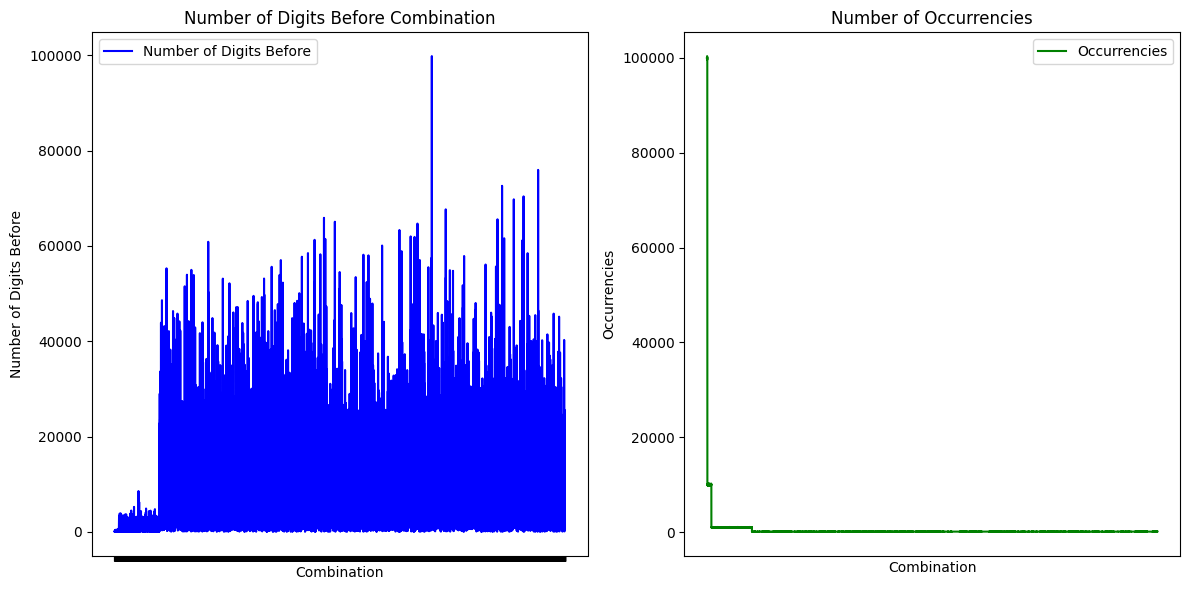

In [4]:
# Creates a figure with two plots
fig, (ax1, ax2) = matplotlib.pyplot.subplots(1, 2, figsize = (12, 6))

# Plot 1 on ax1
ax1.plot(dataframe["Combination"], dataframe["Digits_Before"], label = "Number of Digits Before", color = "blue")

ax1.set_title("Number of Digits Before Combination")
ax1.set_xlabel("Combination")
ax1.set_ylabel("Number of Digits Before")
matplotlib.pyplot.setp(ax1.get_xticklabels(), visible = False) #Hiding tick labels for readability
matplotlib.pyplot.xticks([])
ax1.legend()

# Plot 2 on ax2
ax2.plot(dataframe["Combination"], dataframe["Occurrencies"], label = "Occurrencies", color = "green")

ax2.set_title("Number of Occurrencies")
ax2.set_xlabel("Combination")
ax2.set_ylabel("Occurrencies")
matplotlib.pyplot.setp(ax2.get_xticklabels(), visible = False) #Hiding tick labels for readability
matplotlib.pyplot.xticks([])
ax2.legend()

# Show plots
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

Since the combinations are ordered according to their number of digits, from these plots is evident that this plays a significant role on the two variables we are investigating. Let's go more in-depth by slicing the dataset according to the number of digits for each combination.

In [5]:
slice_mean_std = []

for digits in range(1, 5, 1):
    temp_df = dataframe[dataframe["Digits"] == digits]
    slice_mean_std.append(["Combinations of {} digits".format(digits), len(temp_df), temp_df["Digits_Before"].mean(), temp_df["Digits_Before"].std(), temp_df["Occurrencies"].mean(), temp_df["Occurrencies"].std()])

slice_mean_std.append(["Total", len(dataframe), dataframe["Digits_Before"].mean(), dataframe["Digits_Before"].std(), dataframe["Occurrencies"].mean(), dataframe["Occurrencies"].std()])

print(tabulate(slice_mean_std, headers = ["Digits", "Number of Combinations", "Mean(Digits_Before)", "Std(Digits_Before)", "Mean(Occurrencies)", "Std(Occurrencies)"], tablefmt = "github", numalign = "center", stralign = "center"))

|          Digits          |  Number of Combinations  |  Mean(Digits_Before)  |  Std(Digits_Before)  |  Mean(Occurrencies)  |  Std(Occurrencies)  |
|--------------------------|--------------------------|-----------------------|----------------------|----------------------|---------------------|
| Combinations of 1 digits |            10            |          8.1          |       9.36245        |        100000        |       247.514       |
| Combinations of 2 digits |           100            |        107.07         |       124.869        |        10000         |       97.5524       |
| Combinations of 3 digits |           1000           |        989.874        |       979.122        |       999.995        |       30.9706       |
| Combinations of 4 digits |          10000           |        9940.46        |        9844.9        |        99.999        |       9.98921       |
|          Total           |          11110           |        9037.38        |       9730.32        |       360

The table ahead suggests that, if the number of digits composing the combination arises...
- the **number of digits** to investigate before finding a specific combination **increases** too with a **10x** multiplying factor;
- the **number of occurrencies** of that number **decreases** with a **10x** dividing factor.

In the next chapters an analysis is provided by analysing the results obtained separating the combinations in clusters according to the number of their digits to provide evidence about these observations.

## Combinations of 1 digit

...